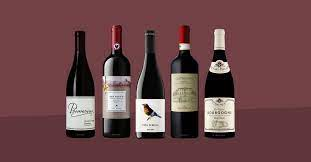

In [7]:
import numpy as np
import pandas as pd
# importing the necessary libraries to read the data

In [43]:
data=pd.read_csv(r"C:\Users\aswin\Untitled Folder 2\winequality-red.csv")
data.head()
# reading the dataset 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
data.shape

(1599, 12)

In [10]:
data.describe()
# using the describe method to understand the data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## The dataset is free of null values
## We can proceed further


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

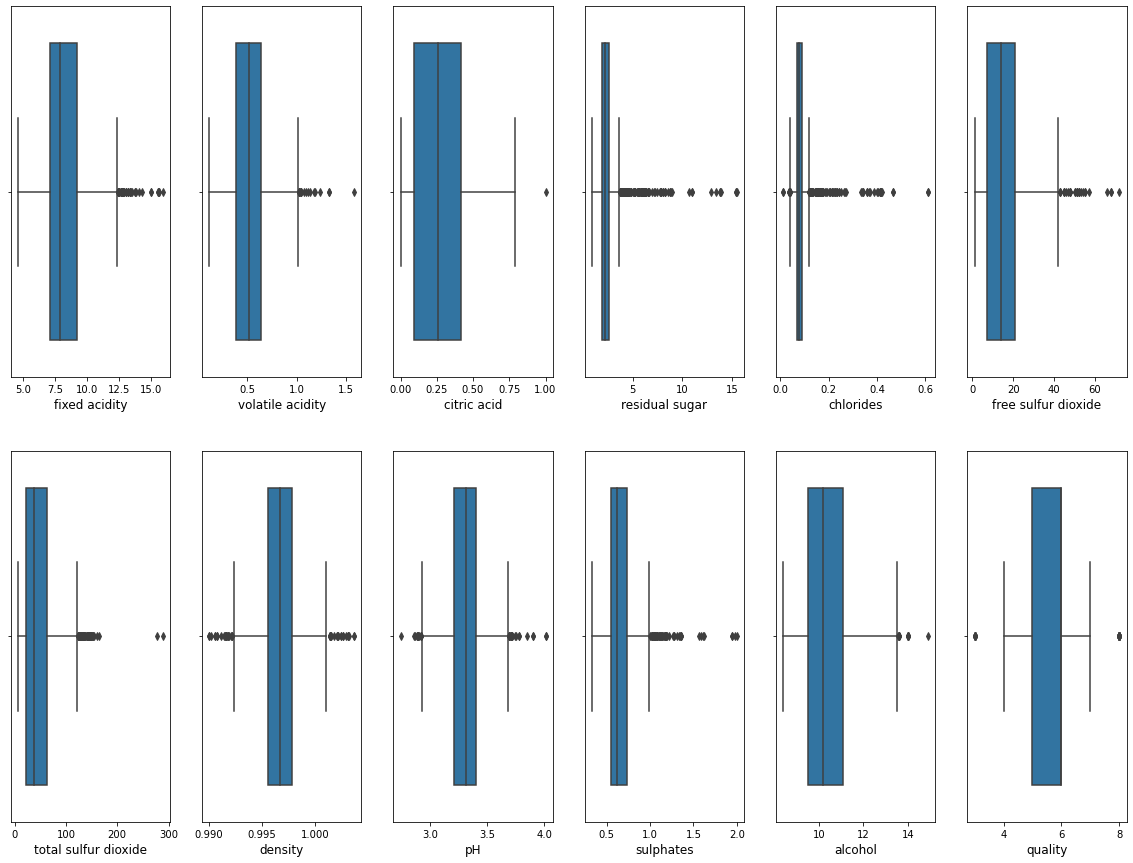

In [14]:
plt.figure(figsize = (20, 15))
for i in range (len(data.columns)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(x = data.iloc[:, i])
    plt.xlabel(data.columns[i], size = 12)

In [15]:
def Outliers(data, feature):
    IQ1 = data[feature].quantile(0.25)
    IQ3 = data[feature].quantile(0.75)
    IQR = IQ3 - IQ1
    
    lower_bound = IQ1 - 1.5 * IQR
    upper_bound = IQ3 + 1.5 * IQR
    
    index = data.index[ (data[feature] < lower_bound) | (data[feature] > upper_bound) ]
    return index

index = []
for i in data.columns:
    index.extend(Outliers(data, i))
index = set(index)
print("Total number of outliers are {}".format(len(index)))

# Dropping all the outliers


Total number of outliers are 420


In [16]:
data.drop(index, inplace = True, axis = 0)
data.shape

(1179, 12)

<AxesSubplot:>

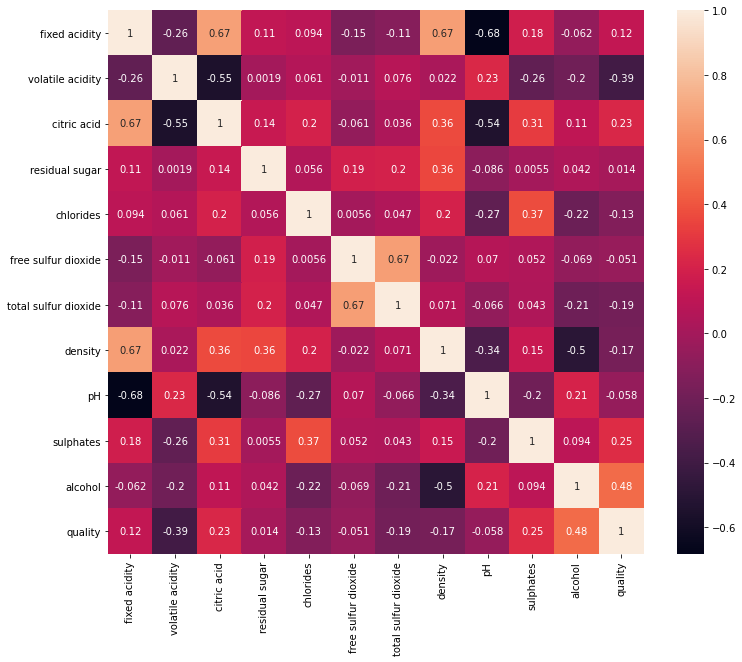

In [47]:
cor = data.corr()
plt.figure(figsize = (12,10))
sns.heatmap(cor, annot = True)

### From the above heatmap, we can see that alcohol content, sulphate content have a positive correlation with the quality of the wine and volatile acidity has a negative correlation with the quality of the wine
### The other factors dont have much effect on the quality of the wine

In [18]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Now we want to estimate the quality of the wine
## So having the quality index in our dataset is futile
## Moving the last column to another dataframe

In [20]:
x=data.iloc[:,:-1]
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [21]:
y=data.iloc[:,-1]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

## Now lets split the data into training and test sets

In [22]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)


In [23]:
print(x_train.shape)
print(y_train.shape)

(825, 11)
(825,)


In [24]:
print(x_test.shape)
print(y_test.shape)

(354, 11)
(354,)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

cla=RandomForestClassifier(n_estimators=150, bootstrap=True)
cla.fit(x_train,y_train)

tr_predicted = cla.predict(x_train)
te_predicted = cla.predict(x_test)

tr_auc = accuracy_score(tr_predicted, y_train)*100
print("The training accuracy is ",tr_auc)

te_auc = accuracy_score(te_predicted, y_test)*100
print("The testing accuracy is ",te_auc)

Recall = recall_score(te_predicted, y_test, average = 'micro')
print("Recall is ",Recall)

Precision = precision_score(te_predicted, y_test, average = 'micro')
print("Precision is ",Precision)

F1 = f1_score(te_predicted, y_test, average = 'micro')
print("F1 score is ",F1)

MSE = mean_squared_error(te_predicted, y_test)
print("Mean Squared Error is ",MSE)


The training accuracy is  100.0
The testing accuracy is  71.1864406779661
Recall is  0.711864406779661
Precision is  0.711864406779661
F1 score is  0.711864406779661
Mean Squared Error is  0.3305084745762712
